<a href="https://colab.research.google.com/github/heberbrandao/coursera-stats/blob/main/Coursera_Heber_Brandao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

import scipy.stats
import statsmodels.api as sm

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url, index_col=0)
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 55.3 KB


# Task 4: Generate Descriptive Statistics and Visualizations


## For the "Median value of owner-occupied homes" provide a boxplot

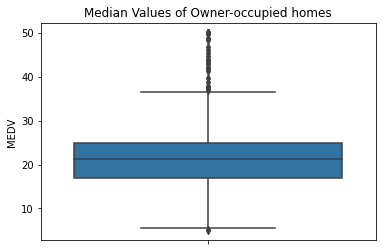

In [2]:
ax = sns.boxplot(y='MEDV', data=boston_df)
plt.title("Median Values of Owner-occupied homes");

## Provide a  bar plot for the Charles river variable


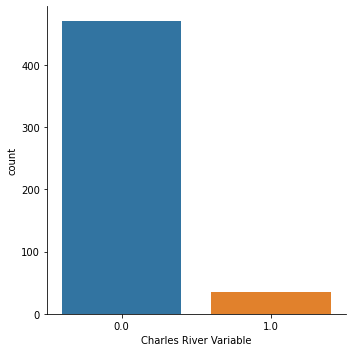

In [3]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel("Charles River Variable");

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [4]:
# Create age groups
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'

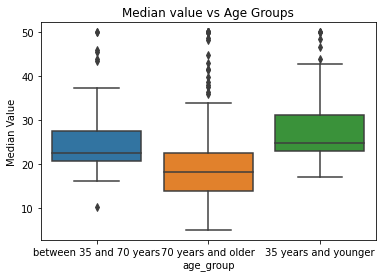

In [5]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title("Median value vs Age Groups")
plt.ylabel("Median Value")
plt.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

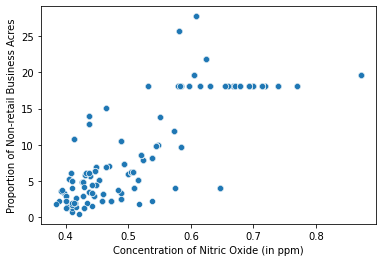

In [6]:
ax = sns.scatterplot(y='INDUS', x='NOX', data=boston_df)
plt.xlabel("Concentration of Nitric Oxide (in ppm)")
plt.ylabel("Proportion of Non-retail Business Acres")
plt.show()

There is a **positive correlation** between variables, until the conentration of Nitric Oxide reaches 0.6ppm

## Create a histogram for the pupil to teacher ratio variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


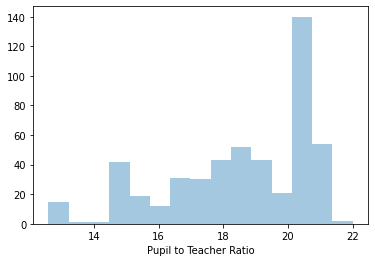

In [7]:
sns.distplot(boston_df.PTRATIO, kde=False, bins=15)
plt.xlabel("Pupil to Teacher Ratio")
plt.show()

# Task 5


---


## Question 1
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Stating Hypothesis**

- \\(H{_0}:\mu{_1} = \mu{_2}\\)

- \\(H{_a}:\mu{_1} ≠ \mu{_2}\\)

\\(a = 0.05\\)

In [8]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

**Conclusion**

Since the p-value is less than 0.05, we will **reject the null hypothesis** as there is no significance difference in median value of houses bounded by Charles river and not.

## Question 2
Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Stating Hypothesis**

- \\(H{_0}:\mu{_1} = \mu{_2}\\)

- \\(H{_a}:\mu{_1} ≠ \mu{_2}\\)

\\(a = 0.05\\)

In [9]:
# Create tiers
boston_df.loc[(boston_df.AGE > 81), 'age_span'] = 'before 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age_span'] = 'after 1940'

In [10]:
scipy.stats.levene(boston_df[boston_df.age_span=='before 1940']['MEDV'],
                  boston_df[boston_df.age_span=='after 1940']['MEDV'],
                  center='mean')

LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

**Conclusion**

Since the p-value is greater than 0.05, we will **fail to reject the null hypothesis** as there is no significance difference in median value of houses before and after 1940.

## Question 3
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Stating Hypothesis**

- \\(H{_0}:\\) There is no relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

- \\(H{_a}:\\) There is a relationship between Nitric Oxide concentration and proportion of non-retail business acres per town.

\\(a = 0.05\\)

In [11]:
scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)

(0.7636514469209151, 7.913361061238693e-98)

**Conclusion**

- Since the p-value is lower than 0.05, we can **reject the null hypothesis** that there is no relationship between the nitric acid concentration and the proportion of non-retail business acres per town.
- Since the correlation coefficient is 0.76, we can state that there is a positive correlation between those variables.

## Question 4
What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [12]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        11:01:06   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**
There is an additional impact of 1.0916 of weighted distance to the five Boston employment centres on the median value of owner occupied homes.